## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [111]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].value_counts()
print(f'There are {len(combined_df)} rows and {len(num_mice)} individual mice in your dataframe.')

There are 1893 rows and 249 individual mice in your dataframe.


In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [113]:
# I saw someone had done a group by mouse ID and Timepoint and then do a value_count
#mice_group = combined_df.groupby(['Mouse ID','Timepoint'])
#mice_group_df = pd.DataFrame(mice_group['Timepoint'].value_counts())
#mice_group_df.head()

In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop([909, 911, 913, 915, 917])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [135]:
# check the number of mice in the clean data frame
num_mice = clean_df['Mouse ID'].value_counts()
print(f'There are {len(clean_df)} rows and {len(num_mice)} individual mice in your dataframe.')

There are 1888 rows and 249 individual mice in your dataframe.


## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = clean_df['Drug Regimen'].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [164]:
# calculate stats for each drug
ramicane_mean = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].mean()
ramicane_median = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].median()
ramicane_var = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].var()
ramicane_std = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].std()
ramicane_sem = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].sem()
print(ramicane_mean, ramicane_median, ramicane_var, ramicane_std, ramicane_sem)
capomulin_mean = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].mean()
capomulin_median = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].median()
capomulin_var = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].var()
capomulin_std = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].std()
capomulin_sem = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].sem()
print(capomulin_mean, capomulin_median, capomulin_var, capomulin_std, capomulin_sem)

40.21674506671052 40.67323554 23.486703952095258 4.846308280753016 0.3209546065084816
40.675741141 41.557808879999996 24.947764120254853 4.9947736805840215 0.32934562340083096


In [165]:
# Generate a summary statistics table
drug_summ_df = pd.DataFrame({'Drug Regimen': ('Ramicane', 'Capomulin'),
                                'Mean': (ramicane_mean, capomulin_mean), 
                                'Median': (ramicane_median, capomulin_median), 
                                'Variance': (ramicane_var, capomulin_var), 
                                'Standard Deviation':(ramicane_std, capomulin_std), 
                                'SEM': (ramicane_sem, capomulin_sem)})
drug_summ_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346


In [196]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
bydrug_df = clean_df.groupby('Drug Regimen', sort=False)

drugs_mean = bydrug_df['Tumor Volume (mm3)'].mean()
drugs_median = bydrug_df['Tumor Volume (mm3)'].median()
drugs_var = bydrug_df['Tumor Volume (mm3)'].var()
drugs_std = bydrug_df['Tumor Volume (mm3)'].std()
drugs_sem = bydrug_df['Tumor Volume (mm3)'].sem()
bydrug_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [197]:
# Assemble the resulting series into a single summary dataframe.
groupby_summ_df = pd.DataFrame({'Drug Regimen': drugs,
                                'Mean': drugs_mean, 
                                'Median': drugs_median, 
                                'Variance': drugs_var, 
                                'Standard Deviation':drugs_std, 
                                'SEM': drugs_sem})
groupby_summ_df 

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862


In [198]:
# Using the aggregation method, produce the same summary statistics in a single line
df_agg = bydrug_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

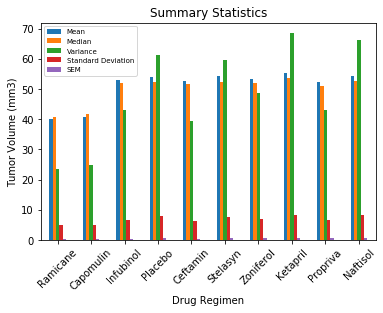

In [210]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_agg.plot.bar(rot=45, title='Summary Statistics')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(['Mean','Median','Variance','Standard Deviation','SEM'], loc=2, fontsize=7)
plt.show()

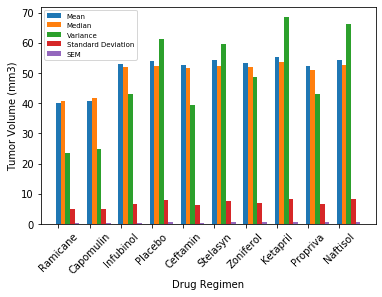

In [258]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = drugs
mean = groupby_summ_df['Mean']
median = groupby_summ_df['Median']
variance = groupby_summ_df['Variance']
standard_dev = groupby_summ_df['Standard Deviation']
sem = groupby_summ_df['SEM']

ticks = np.arange(len(labels))
width = 0.15

fig,ax = plt.subplots()
rects1 = ax.bar(ticks, mean, width, label='Mean')
rects1 = ax.bar(ticks + width, median, width, label='Median')
rects1 = ax.bar(ticks + width*2, variance, width, label='Variance')
rects1 = ax.bar(ticks + width*3, standard_dev, width, label='Standard Deviation')
rects1 = ax.bar(ticks + width*4, sem, width, label='SEM')

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.legend(['Mean','Median','Variance','Standard Deviation','SEM'], loc=2, fontsize=7)

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
